# **How to handle imbalanced datasets**

### **Install imbalanced-learn**

In [1]:
#! pip install -U imbalanced-learn

### **Read data**

In [2]:
import pandas as pd

df = pd.read_csv('hcv_classification.csv', index_col=False)

In [3]:
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,Activity
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive
574,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive
575,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive
576,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,inactive


In [4]:
X = df.drop(['Activity'], axis=1)
y = df['Activity']

### **Class distribution**

In [5]:
y.value_counts()

active      412
inactive    166
Name: Activity, dtype: int64

<AxesSubplot:ylabel='Activity'>

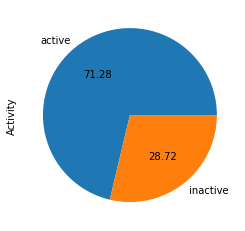

In [6]:
# Show pie plot (Approach 1)
y.value_counts().plot.pie(autopct='%.2f')

([<matplotlib.patches.Wedge at 0x199785e8700>,
 [Text(-0.6818247054992795, 0.8632004813314349, 'active'),
  Text(0.6818247054992798, -0.8632004813314348, 'inactive')],
 [Text(-0.3719043848177888, 0.4708366261807826, '71.28'),
  Text(0.3719043848177889, -0.47083662618078254, '28.72')])

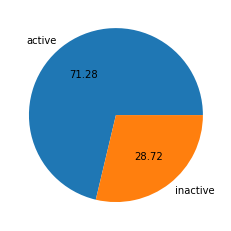

In [7]:
# Show pie plot (Approach 2)
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.pie(y.value_counts(), autopct='%.2f', labels=y.value_counts().index)

### **Random Undersampling**

``'not minority'`` = resample all classes but the minority class

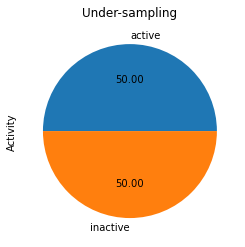

In [8]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [9]:
# Class distribution
y_res.value_counts()

active      166
inactive    166
Name: Activity, dtype: int64

### **Random Oversampling**

``"not majority"`` = resample all classes but the majority class



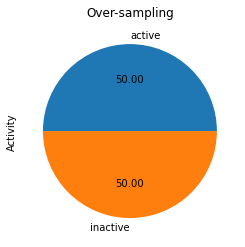

In [10]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [11]:
y_res.value_counts()

active      412
inactive    412
Name: Activity, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3,random_state=0)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [19]:
model = LogisticRegression()
model.fit(X_train,y_train)

lr_prediction = model.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test))

Logistic Regression accuracy =  0.9112903225806451


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
